In [58]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
RADIANS = 57.2957795
base_lat = 12.358065526666667
base_lon = 76.595181815


##########################################################################################################################

In [94]:
def read_llh(filename):
    lat_list = []
    lon_list = []
    with open(filename,"r") as file:
        data = file.readlines()
        for lines in data:
            data_arr = lines.split("   ")
            rover_lat = float(data_arr[1])
            rover_lon = float(data_arr[2])
            lat_list.append(rover_lat)
            lon_list.append(rover_lon)
    return lat_list, lon_list
##########################################################################################################################

In [59]:
def DEG_TO_RADIANS(x):
    return (x/RADIANS); 

def METERS_DEGLON(coord):
    d2r=DEG_TO_RADIANS(coord);
    return((111415.13 * math.cos(d2r))- (94.55 * math.cos(3.0*d2r)) + (0.12 * math.cos(5.0*d2r)));

def METERS_DEGLAT(coord):
    d2r=DEG_TO_RADIANS(coord);
    return(111132.09 - (566.05 * math.cos(2.0*d2r))+ (1.20 * math.cos(4.0*d2r)) - (0.002 * math.cos(6.0*d2r)));


def LL_TO_XY(base_lat,base_lon,cart_lat,cart_lon):
    xx = (cart_lon - base_lon)*METERS_DEGLON(cart_lat);
    yy = (base_lat - cart_lat)*METERS_DEGLAT(cart_lon);

    r = math.sqrt(xx*xx + yy*yy);


    if(r):

        ct = xx/r;
        st = yy/r;
        xx = r * ( (ct * math.cos(angle)) + (st * math.sin(angle)) );
        yy = r * ( (st * math.cos(angle)) - (ct * math.sin(angle)) );

    #Calculate offset if any
    pxpos_mtrs = xx + xoffset_mtrs;
    pypos_mtrs = yy + yoffset_mtrs;
    #return pxpos_mtrs , pypos_mtrs 
    return xx,yy

##########################################################################################################################

In [60]:
def global_2_local(x, y,car_x, car_y, car_heading):
    x2 = (x-car_x)*np.cos(car_heading) + (y-car_y)*np.sin(car_heading)
    y2 = -(x-car_x)*np.sin(car_heading) + (y-car_y)*np.cos(car_heading)
    return x2,y2

In [61]:
def global_2_local_list(x, y,car_x, car_y, car_heading):
    local_x_list,  local_y_list = [], []
    for i in range(0,len(x)):
        x2 = (x[i]-car_x)*np.cos(car_heading) + (y[i]-car_y)*np.sin(car_heading)
        y2 = -(x[i]-car_x)*np.sin(car_heading) + (y[i]-car_y)*np.cos(car_heading)
        local_x_list.append(x2)
        local_y_list.append(y2)
    return local_x_list,local_y_list

In [62]:
def cut_gps(x, n=0):
    lat , long = [], []
    waypoints = []
    for i in range(0,len(x), n):
        #print(i)
        lat.append(x[i][0][0][0])
        long.append(x[i][0][0][1])
        waypoints.append([x[i][0][0][0],x[i][0][0][1]])
    return lat, long , waypoints
                  


In [63]:
def cut_compass(x, n=0):
    compass = []
    for i in range(0,len(x),n):
        #print(i)
        compass.append(x[i][0])
    return compass

##########################################################################################################################

In [65]:
def gps_global(lat, long):
    lat_list = []
    lon_list = []
    x = []
    y = []
    for i in range (0,len(lat)):
            cart_lat = lat[i]
            cart_lon = long[i]
            xx,yy = LL_TO_XY(base_lat,base_lon,cart_lat,cart_lon)
#             lat_list.append(cart_lat)
#             lon_list.append(cart_lon)
            x.append(xx)
            y.append(yy)
    return x,y

In [64]:
def plot_xy(lat_plot, long_plot, lat2_plot, long2_plot):
    fig = plt.figure(figsize=(10,10))
    
   
    plt.scatter(long_plot,lat_plot, s=1  ,label='State', c='g')
    plt.scatter(long2_plot,lat2_plot, s=1, label='State', c='b')
    
    plt.scatter(long_plot[0],lat_plot[0] ,s=5, label='Start', c='r')
    plt.scatter(long_plot[-1],lat_plot[-1], s=5, label='Goal', c='y')

    plt.xlabel('Long')
    plt.ylabel('Lat')
    plt.title('Position')
    plt.legend(loc='best')
   


In [66]:
a = np.load('./result.npy')
b = np.load('./result_27.npy')

In [67]:
angle = DEG_TO_RADIANS(270)

xoffset_mtrs = 0.0
yoffset_mtrs = 0.0

lat_plot, long_plot , waypoints_1 = cut_gps(a, 15)
lat2_plot, long2_plot, waypoints_2 = cut_gps(b, 15)
compass = cut_compass(a, 15)
compass_2 = cut_compass(b, 15)

In [84]:
global_x.index(0.8627757874080658)

25

In [68]:
global_x , global_y = gps_global(lat_plot, long_plot)

In [69]:
car_x = 0.8627757874080658 # Car's X position
car_y = 31.329421205037587 # Car's Y position
car_heading = 0

In [70]:
local_x, local_y = global_2_local(x, y,car_x, car_y, car_heading)

In [71]:
local_x_list , local_y_list = global_2_local_list(global_x, global_y,car_x, car_y, car_heading)

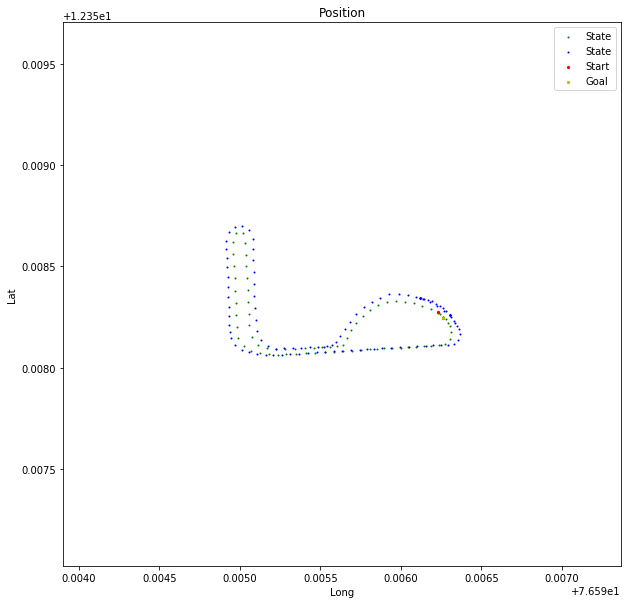

In [72]:
plot_xy(lat_plot, long_plot, lat2_plot, long2_plot)

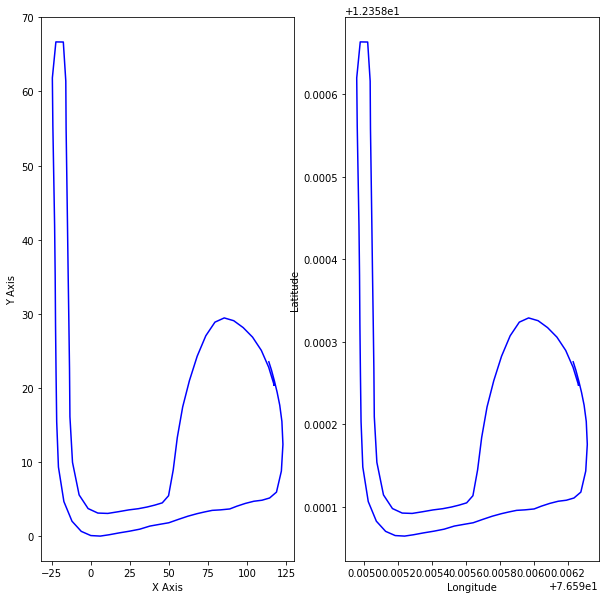

In [79]:
fig = plt.figure(figsize=(10, 10))
    
plt.subplot(1,2,1)
plt.plot(global_y,global_x,"b")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

plt.subplot(1,2,2)
plt.plot(long_plot,lat_plot,"b")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

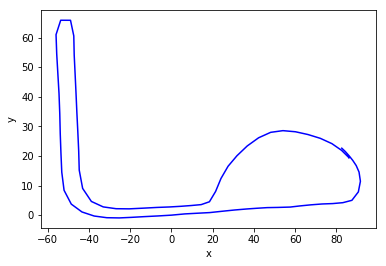

In [81]:
plt.plot(local_y_list, local_x_list ,"b")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Test

In [95]:
filename = "./inner.LLH"
lat3, long3 = read_llh(filename)

In [20]:

lat2 = []
lon2 = []
x2 = []
y2 = []

base_lat = 12.358065526666667
base_lon = 76.595181815


with open(filename,"r") as file:
    data = file.readlines()
    for lines in data:
        data_arr = lines.split("   ")
        rover_lat = float(data_arr[1])
        rover_lon = float(data_arr[2])
        xx,yy = LL_TO_XY(base_lat,base_lon,rover_lat,rover_lon)
        lat2.append(rover_lat)
        lon2.append(rover_lon)
        x2.append(xx)
        y2.append(yy)

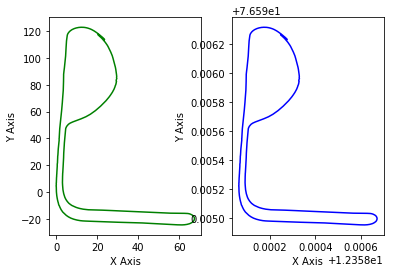

In [22]:

plt.subplot(1,2,1)
plt.plot(x2,y2,"g")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

plt.subplot(1,2,2)
plt.plot(lat2,lon2,"b")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

In [24]:
def cartesian_x(lat,lon):
    lat=radians(lat)
    lon=radians(lon)
    R=6371.0
    x = R * cos(lat) * cos(lon)
    return x
def cartesian_y(lat,lon):
    lat=radians(lat)
    lon=radians(lon)
    R=6371.0
    y = R * cos(lat) * sin(lon)
    return y

In [ ]:
R = [cosθ , -sinθ
     sinθ ,  cosθ]

A = [x1, y1]

B_global = [x2 y2]

B_local = [x2' 
           y2']
